<a href="https://colab.research.google.com/github/julyane-domingues/Challenge-1-Data-Science/blob/main/Challenge_1_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [38]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [39]:
pip install matplotlib seaborn

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

dados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

#1. Análise do faturamento


In [119]:
faturamento_por_loja = dados.groupby('Loja')['Preço'].sum().reset_index()

print(faturamento_por_loja)


     Loja       Preço
0  Loja 1  1534509.12
1  Loja 2  1488459.06
2  Loja 3  1464025.03
3  Loja 4  1384497.58


# 2. Vendas por Categoria


In [108]:
mais_vendidos_por_categoria = dados.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade de Vendas')

mais_populares = mais_vendidos_por_categoria.sort_values(['Loja', 'Quantidade de Vendas'], ascending=[True, False])

print(mais_populares)

      Loja   Categoria do Produto  Quantidade de Vendas
6   Loja 1                 moveis                   465
2   Loja 1            eletronicos                   448
0   Loja 1             brinquedos                   324
1   Loja 1       eletrodomesticos                   312
3   Loja 1        esporte e lazer                   284
4   Loja 1  instrumentos musicais                   182
5   Loja 1                 livros                   173
7   Loja 1  utilidades domesticas                   171
14  Loja 2                 moveis                   442
10  Loja 2            eletronicos                   422
8   Loja 2             brinquedos                   313
9   Loja 2       eletrodomesticos                   305
11  Loja 2        esporte e lazer                   275
12  Loja 2  instrumentos musicais                   224
13  Loja 2                 livros                   197
15  Loja 2  utilidades domesticas                   181
22  Loja 3                 moveis               

# 3. Média de Avaliação das Lojas

In [85]:
media_avaliacao_loja = dados.groupby('Loja')['Avaliação da compra'].mean().reset_index()
media_avaliacao_loja['Avaliação da compra'] = media_avaliacao_loja['Avaliação da compra'].round(2)

print(media_avaliacao_loja)


     Loja  Avaliação da compra
0  Loja 1                 3.98
1  Loja 2                 4.04
2  Loja 3                 4.05
3  Loja 4                 4.00


# 4. Produtos Mais e Menos Vendidos

In [86]:
contagem_produtos = dados.groupby(['Loja', 'Produto']).size().reset_index(name='Frequência')
custo_medio = dados.groupby(['Loja', 'Produto'])['Preço'].mean().reset_index(name='Custo Médio')

mais_vendidos = contagem_produtos.loc[contagem_produtos.groupby('Loja')['Frequência'].idxmax()]
menos_vendidos = contagem_produtos.loc[contagem_produtos.groupby('Loja')['Frequência'].idxmin()]

mais_vendidos = mais_vendidos.merge(custo_medio, on=['Loja', 'Produto'])
menos_vendidos = menos_vendidos.merge(custo_medio, on=['Loja', 'Produto'])

print(mais_vendidos)
print(menos_vendidos)


     Loja                   Produto  Frequência  Custo Médio
0  Loja 1             Guarda roupas          60   654.713000
1  Loja 2  Iniciando em programação          65    64.153231
2  Loja 3             Kit banquetas          57   390.630877
3  Loja 4                  Cama box          62   708.525323
     Loja            Produto  Frequência  Custo Médio
0  Loja 1       Celular ABXY          33  1319.226364
1  Loja 2  Jogo de tabuleiro          32   242.174375
2  Loja 3   Blocos de montar          35    47.137429
3  Loja 4           Guitarra          33  1043.353636


# 5. Frete Médio por Loja


In [92]:
frete_medio_loja = dados.groupby('Loja')['Frete'].mean().reset_index()

print(frete_medio_loja.round(2))


# Exemplo: frete vs avaliação
avaliacao_frete = dados.groupby('Loja')[['Frete', 'Avaliação da compra']].mean().reset_index()

fig = px.scatter(avaliacao_frete, x='Loja', y='Frete', size='Avaliação da compra',
                 color='Loja', hover_data=['Avaliação da compra'],
                 title='Frete Médio e Avaliação por Loja (Bubble Chart)')
fig.show()



     Loja  Frete
0  Loja 1  34.69
1  Loja 2  33.62
2  Loja 3  33.07
3  Loja 4  31.28


#**Análise geral**

Após uma análise detalhada dos dados fornecidos por cada loja, apresento a seguir um breve resumo, começando pelo faturamento por loja. A Loja 1 apresentou o maior faturamento, com 26,1% do total, enquanto a Loja 4 apresentou o menor desempenho, com 23,1%.

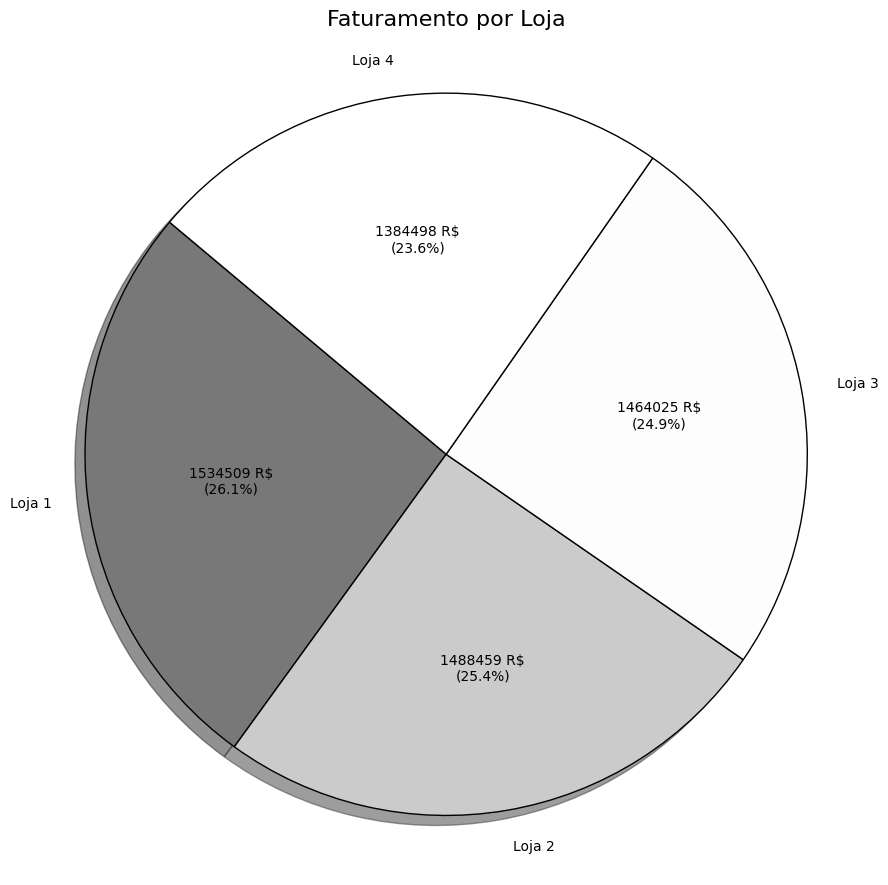

In [118]:
def func_autopct(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))
    return f'{absolute} R$\n({pct:.1f}%)'

sizes = faturamento_por_loja['Preço']
labels = faturamento_por_loja['Loja']

plt.figure(figsize=(9, 9))
plt.pie(sizes, labels=labels, autopct=lambda pct: func_autopct(pct, sizes),startangle=140,colors=plt.cm.Greys_r(range(100, 400, 75)), shadow=True, wedgeprops={'edgecolor': 'Black'})

plt.title('Faturamento por Loja', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


Em todas as lojas, as categorias de mais populares são Móveis e Eletrônicos.

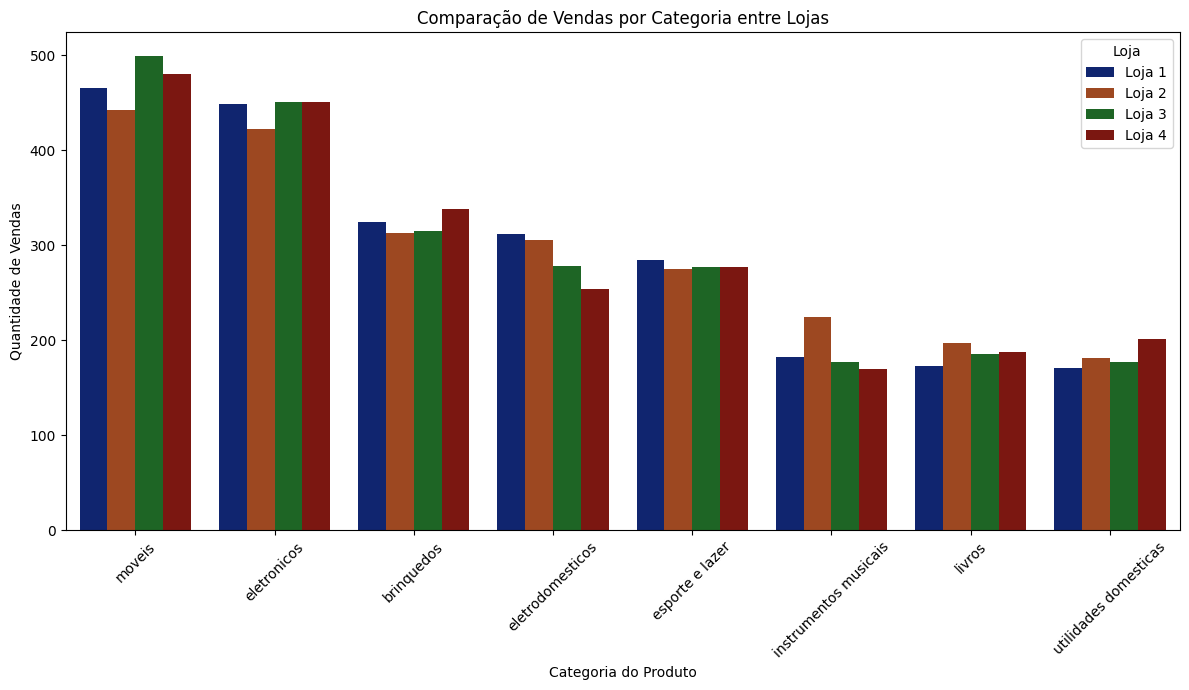

In [111]:
plt.figure(figsize=(12, 7))
sns.barplot(data=mais_populares,x='Categoria do Produto',y='Quantidade de Vendas',hue='Loja',palette='dark')

plt.title('Comparação de Vendas por Categoria entre Lojas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


As avaliações médias entre as lojas são bem semelhantes. A Loja 1 apresenta a menor média, com 3,98, enquanto a Loja 3 possui a maior, com 4,5.

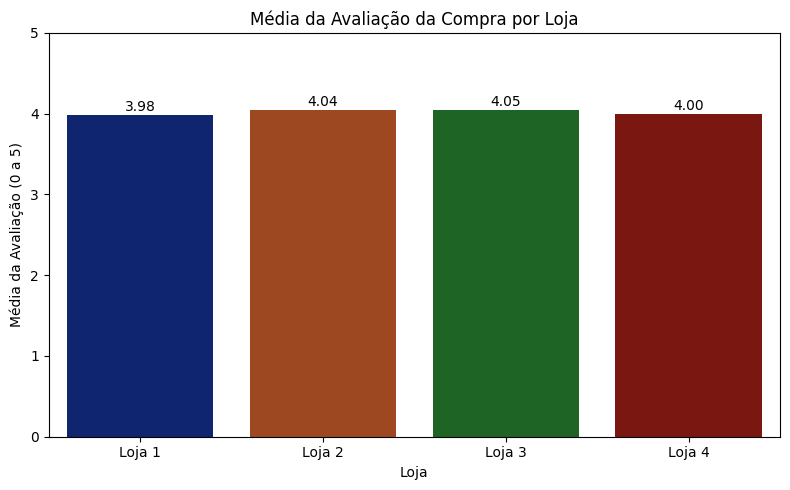

In [99]:

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=media_avaliacao_loja, x='Loja', y='Avaliação da compra', hue='Loja', palette='dark')
plt.ylim(0, 5)
plt.title('Média da Avaliação da Compra por Loja')
plt.ylabel('Média da Avaliação (0 a 5)')
plt.xlabel('Loja')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.05,
        f'{height:.2f}',
        ha='center')

plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

Em relação aos produtos mais e menos vendidos, o gráfico abaixo apresenta, para cada loja, os itens com maior e menor volume de vendas considerando também o preço médio de cada item.


In [93]:
import plotly.express as px

# Produtos mais vendidos
fig = px.scatter(
    mais_vendidos,
    x='Loja',
    y='Frequência',
    size='Custo Médio',
    color='Produto',
    hover_name='Produto',
    title='Produtos Mais Vendidos por Loja',
    size_max=60
)
fig.show()

# Produtos menos vendidos
fig2 = px.scatter(
    menos_vendidos,
    x='Loja',
    y='Frequência',
    size='Custo Médio',
    color='Produto',
    hover_name='Produto',
    title='Produtos Menos Vendidos por Loja',
    size_max=60
)
fig2.show()


O frete também foi analisado. A loja com a maior média de taxa de frete é a loja 1 com o valor de 34,69 e a menor é da loja 4, 31,28.

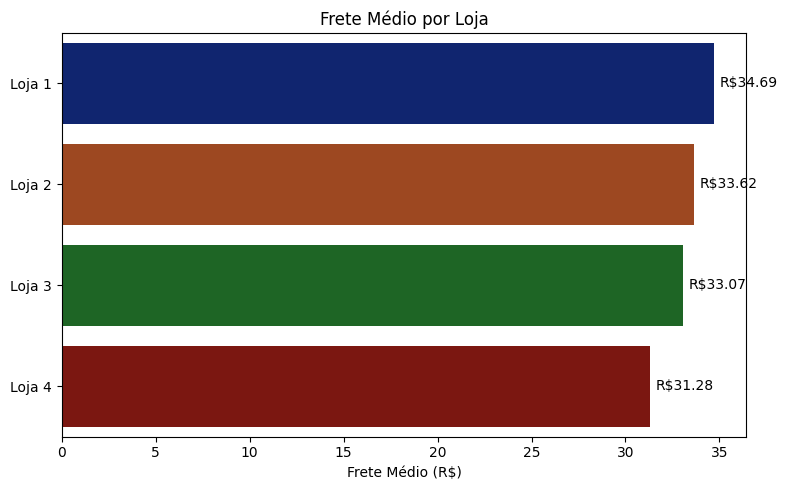

In [98]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=frete_medio_loja, y='Loja', x='Frete', hue='Loja', palette='dark')

for i, p in enumerate(ax.patches):
    valor = p.get_width()
    ax.text(valor + 0.3, p.get_y() + p.get_height() / 2, f'R${valor:.2f}', va='center')

plt.title('Frete Médio por Loja')
plt.xlabel('Frete Médio (R$)')
plt.ylabel('')
plt.tight_layout()
plt.show()



# **Conclusão**

Em conclusão, **a loja 1 apresenta o desempenho mais crítico** e, por isso, será a minha escolha para sugestão de venda.
Apesar de registrar o maior faturamento entre as lojas, a loja 1 possui baixo indice de satisfação dos clientes (3,8). Além disso, apresenta o frete mais caro. O item com menor quantidade de vendas é o Celular ABXY, cujo custo médio é de 1390,22, o que pode indicar que um produto de valor agregado está mal posicionado na loja, ou seja, pouca gestão de venda.
Esses fatores podem impactar negativamente a sustentabilidade e o crescimento da loja no longo prazo.
